In [14]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')
import cartopy.feature as cfeature

from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.colors as mcolors


from matplotlib import colors  # Correct import

In [15]:
Tmax = xr.open_dataset('Ghana_ERA5_dTx_1991_2020.nc').mx2t 
Tmin = xr.open_dataset('Ghana_ERA5_dTn_1991_2020.nc').mn2t

In [16]:
Tmax

<xarray.DataArray 'mx2t' (time: 10958, latitude: 30, longitude: 20)>
array([[[27.242498, 27.578254, ..., 27.055296, 27.039595],
        [27.680913, 28.049279, ..., 26.924858, 26.910365],
        ...,
        [30.039661, 30.441844, ..., 30.358509, 30.317445],
        [29.732891, 29.863329, ..., 29.608492, 29.526365]],

       [[27.453855, 27.577046, ..., 27.599994, 27.589124],
        [28.307739, 28.447839, ..., 27.496127, 27.486465],
        ...,
        [30.295706, 30.665279, ..., 30.668902, 30.633877],
        [29.992559, 30.06744 , ..., 29.953911, 29.891107]],

       ...,

       [[27.858454, 28.017877, ..., 28.532382, 28.614509],
        [27.978021, 28.162808, ..., 28.558952, 28.649534],
        ...,
        [33.659307, 33.389977, ..., 35.394852, 35.356204],
        [33.340459, 33.270409, ..., 34.786143, 34.897257]],

       [[27.928503, 27.933334, ..., 28.406775, 28.311362],
        [27.901933, 27.911595, ..., 28.339141, 28.234066],
        ...,
        [34.700393, 34.497489, ..., 35.716116, 35.64365 ],
        [34.377922, 34.294586, ..., 35.069966, 35.188326]]])
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01T15:00:00 ... 2020-12-31T15:00:00
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    long_name:  Maximum temperature at 2 metres since previous post-processing
    units:      K

In [17]:
Tmin

<xarray.DataArray 'mn2t' (time: 10958, latitude: 30, longitude: 20)>
array([[[27.225832, 27.244384, ..., 27.314882, 27.264173],
        [26.977231, 26.99331 , ..., 27.321067, 27.266647],
        ...,
        [16.209493, 16.176099, ..., 17.215026, 17.205132],
        [15.882973, 15.932446, ..., 16.56446 , 16.839033]],

       [[26.932706, 26.660606, ..., 28.159629, 28.026053],
        [26.360059, 26.059512, ..., 28.110156, 27.974107],
        ...,
        [16.610222, 16.606512, ..., 17.16679 , 17.071555],
        [16.339359, 16.376463, ..., 16.559513, 16.733904]],

       ...,

       [[27.149149, 27.019283, ..., 27.489274, 27.502879],
        [26.945074, 26.804077, ..., 27.506589, 27.515247],
        ...,
        [17.811172, 17.198947, ..., 19.743082, 19.644137],
        [17.694912, 17.672649, ..., 18.963887, 19.381931]],

       [[27.131833, 27.109571, ..., 28.063157, 28.066868],
        [26.910443, 26.883233, ..., 28.107683, 28.107683],
        ...,
        [18.533474, 18.435766, ..., 20.597724, 20.569277],
        [18.06101 , 18.420924, ..., 19.939736, 20.347886]]])
Coordinates:
  * time       (time) datetime64[ns] 1991-01-01T06:00:00 ... 2020-12-31T06:00:00
  * longitude  (longitude) float32 -3.375 -3.125 -2.875 ... 0.875 1.125 1.375
  * latitude   (latitude) float32 4.625 4.875 5.125 5.375 ... 11.38 11.62 11.88
Attributes:
    long_name:  Minimum temperature at 2 metres since previous post-processing
    units:      K

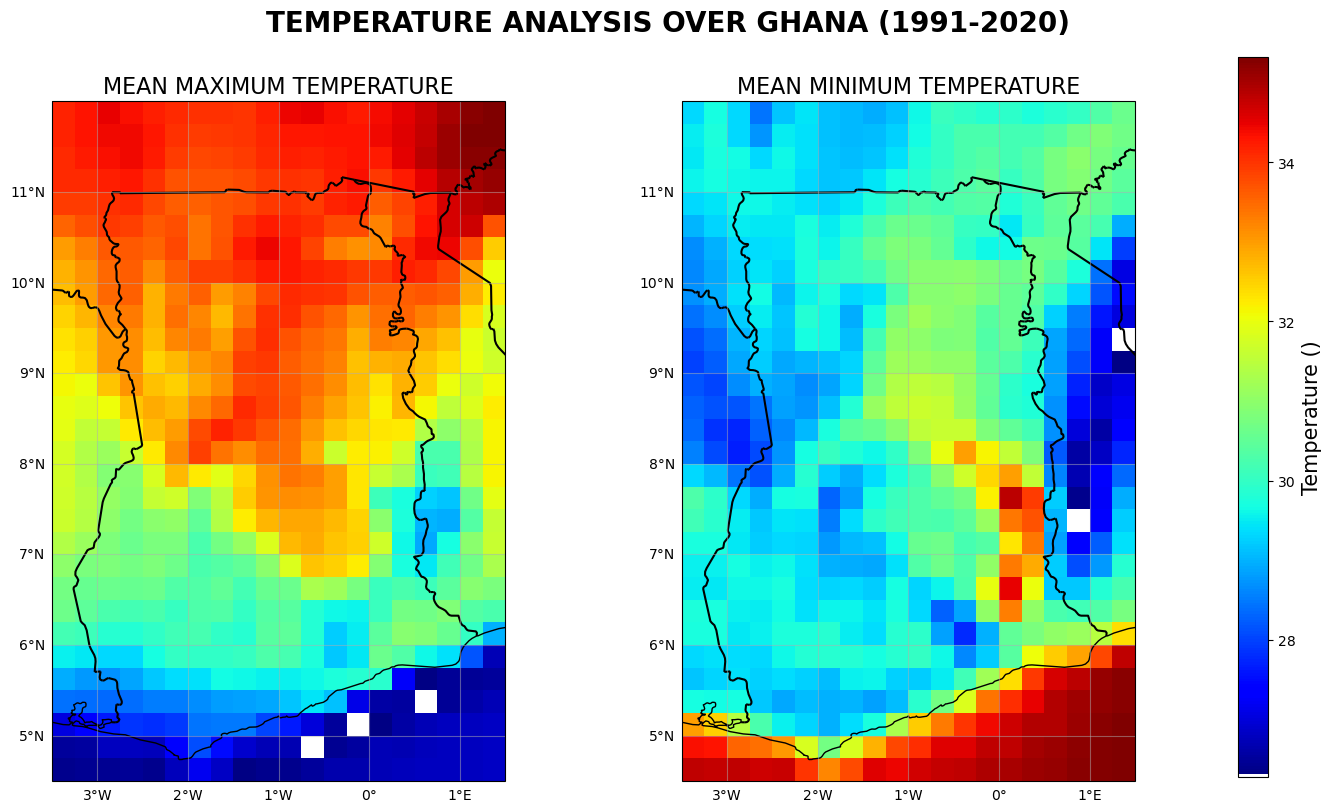

In [35]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Load datasets (assuming they contain time, latitude, and longitude)
Tmax = xr.open_dataset('Ghana_ERA5_dTx_1991_2020.nc').mx2t
Tmin = xr.open_dataset('Ghana_ERA5_dTn_1991_2020.nc').mn2t

# Calculate mean over the time dimension (1991–2020)
Tmax_mean = Tmax.mean(dim='time')
Tmin_mean = Tmin.mean(dim='time')

# # Modify the colormap to start from white
# cmap = plt.get_cmap('jet')
# colors = cmap(np.arange(cmap.N))
# colors[0] = np.array([1.0, 1.0, 1.0, 1.0])  # Set first color to white
# new_cmap = mcolors.LinearSegmentedColormap.from_list("new_jet", colors)

# Plot the data
fig, ax = plt.subplots(1, 2, figsize=(15, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Set up maximum temperature plot
ax[0].add_feature(cfeature.LAND)
ax[0].add_feature(cfeature.BORDERS, linewidth=1.5)
ax[0].coastlines(resolution='10m')
ax[0].set_title('MEAN MAXIMUM TEMPERATURE', fontsize=16)
tmax_plot = ax[0].pcolormesh(Tmax_mean.longitude, Tmax_mean.latitude, Tmax_mean,
                             cmap=new_cmap, transform=ccrs.PlateCarree())

# Set up minimum temperature plot
ax[1].add_feature(cfeature.LAND)
ax[1].add_feature(cfeature.BORDERS, linewidth=1.5)
ax[1].coastlines(resolution='10m')
ax[1].set_title('MEAN MINIMUM TEMPERATURE', fontsize=16)
tmin_plot = ax[1].pcolormesh(Tmin_mean.longitude, Tmin_mean.latitude, Tmin_mean,
                             cmap=new_cmap, transform=ccrs.PlateCarree())

# Add gridlines
for axes in ax:
    gl = axes.gridlines(draw_labels=True, alpha=0.5)
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

# Create a shared color bar
cbar_ax = fig.add_axes([0.88, 0.05, 0.02, 0.9])  # Position: left, bottom, width, height
cbar = fig.colorbar(tmax_plot, cax=cbar_ax, orientation='vertical')
cbar.set_label('Temperature ()', fontsize=15)

# Add a super title
fig.suptitle('TEMPERATURE ANALYSIS OVER GHANA (1991-2020)', fontweight='bold', fontsize=20, y=1.01)

# Show the plot
plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit color bar
plt.show()
